In [1]:
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [2]:
data_dir = r"..\datas\train"
data_dir_test = r"..\datas\test"
categories = ["fundusImage","other"]
img_size = 128

In [3]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
                pass

create_training_data()     

In [4]:
random.shuffle(training_data)

x_training = []
y_training = []

for features, label in training_data:
    x_training.append(features)
    y_training.append(label)
    
x_training = np.array(x_training).reshape(-1, img_size, img_size, 1)

In [5]:
# Training

num_epochs = 10
batch_size = 14
val_split = 0.1
adam = keras.optimizers.Adam(lr=0.002)

x_training = x_training/255.0

model = Sequential()

#bloco 1
model.add(Conv2D(8, (3,3), activation="relu", input_shape = x_training.shape[1:]))
model.add(Conv2D(16, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#bloco 2
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

#bloco 3
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(16, (3,3), activation="relu"))
model.add(Conv2D(8, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())


model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
historico = model.fit(x_training, y_training, batch_size=batch_size, validation_split=val_split, epochs=num_epochs, shuffle=True)
model.save('trainingCNN.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 630 samples, validate on 70 samples
Epoch 1/10
630/630 [==============================] - 57s 91ms/sample - loss: 0.2160 - acc: 0.9175 - val_loss: 3.4800 - val_acc: 0.4571
Epoch 2/10
630/630 [==============================] - 57s 91ms/sample - loss: 0.0978 - acc: 0.9730 - val_loss: 3.7504 - val_acc: 0.4571
Epoch 3/10
630/630 [==============================] - 58s 91ms/sample - loss: 0.0727 - acc: 0.9810 - val_loss: 2.2270 - val_acc: 0.5429
Epoch 4/10
630/630 [==============================] - 57s 91ms/sample - loss: 0.0858 - acc: 0.9683 - val_loss: 0.9267 - val_acc: 0.5857
Epoch 5/10
630/630 [==============================] - 57s 90ms/sample - loss: 0.0677 - acc: 0.9762 - val_loss: 0.2393 - val_acc: 0.8857
Epoch 6/10
630/630 [==============================] - 58s 92ms/

In [6]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(data_dir_test, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                test_data.append([new_array, class_num])
            except Exception as e:
                pass

create_test_data()  

In [8]:
random.shuffle(test_data)

x_test = []
y_test = []

for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    
x_test = np.array(x_test).reshape(-1, img_size, img_size, 1)
prediction = model.predict(x_test)
perda, acuracia = model.evaluate(x_test, y_test)

300/300 [==============================] - 3s 10ms/sample - loss: 131.5802 - acc: 0.5767


In [ ]:
print('Resultado teste:', np.argmax(prediction[10]))
print('Número da imagem de teste:', y_test[10])
plt.imshow(test_data[10][0])

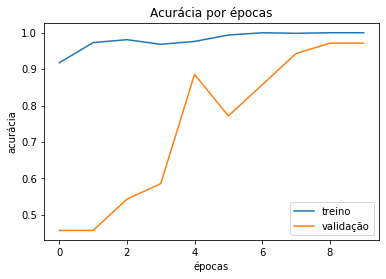

In [9]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

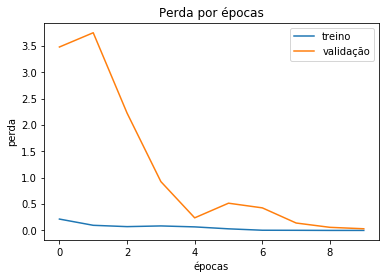

In [10]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])